Predicted Power for Age 70: 135.27


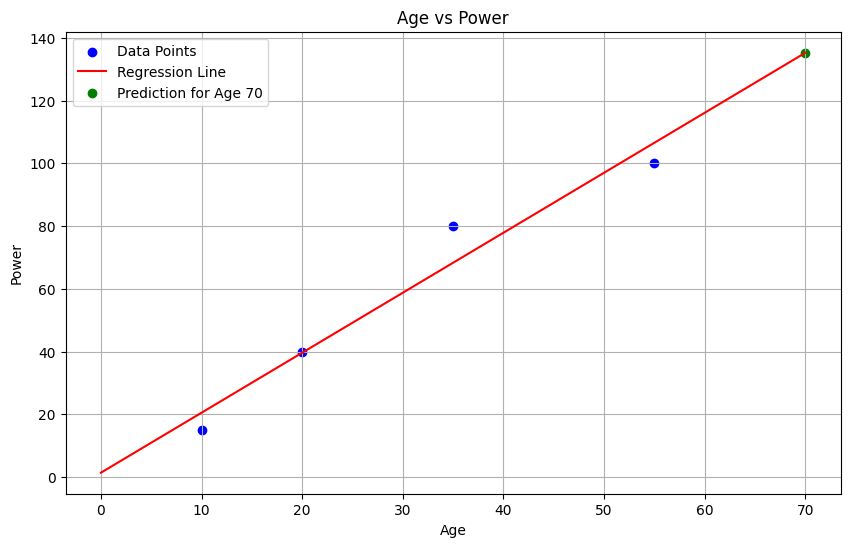

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
ages = np.array([10, 20, 35, 55]).reshape(-1, 1)
powers = np.array([15, 40, 80, 100])

# Create and train the model
model = LinearRegression()
model.fit(ages, powers)

# Predict for age 70
prediction_age = np.array([[70]])
prediction = model.predict(prediction_age)

# Generate points for the regression line
x_reg = np.array([[0], [70]])
y_reg = model.predict(x_reg)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(ages, powers, color='blue', label='Data Points')
plt.plot(x_reg, y_reg, color='red', label='Regression Line')
plt.scatter(prediction_age, prediction, color='green', label='Prediction for Age 70')

plt.title('Age vs Power')
plt.xlabel('Age')
plt.ylabel('Power')
plt.legend()
plt.grid(True)

# Print the prediction
print(f"Predicted Power for Age 70: {prediction[0]:.2f}")

plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted Power for Age 70: 135.55


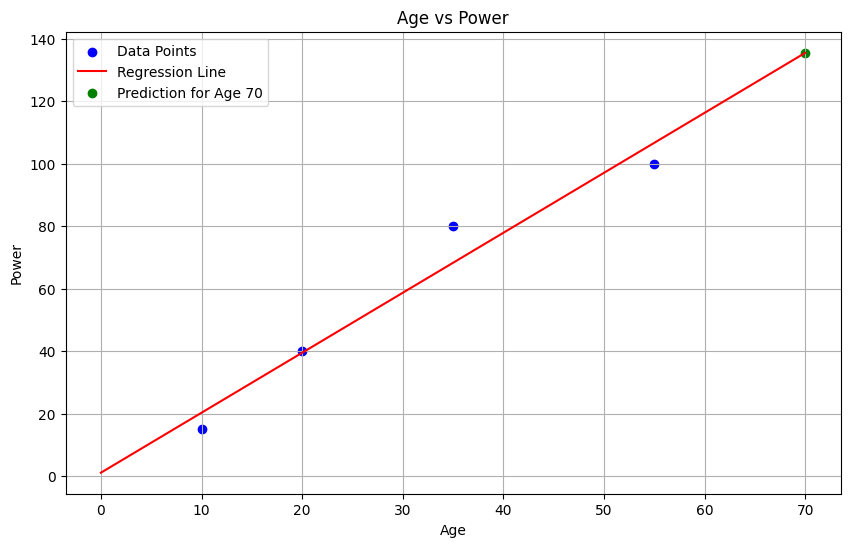

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# Create DataFrame
data = pd.DataFrame({
    'Age': [10, 20, 35, 55],
    'Power': [15, 40, 80, 100]
})

# Prepare the data
X = data['Age'].values.reshape(-1, 1)
y = data['Power'].values

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Create and compile the model
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,), activation='linear')
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_scaled, y_scaled, epochs=1000, verbose=0)

# Predict for age 70
age_70 = np.array([[70]])
age_70_scaled = scaler_X.transform(age_70)
prediction_scaled = model.predict(age_70_scaled)
prediction = scaler_y.inverse_transform(prediction_scaled)

# Generate points for the regression line
X_reg = np.linspace(0, 70, 100).reshape(-1, 1)
X_reg_scaled = scaler_X.transform(X_reg)
y_reg_scaled = model.predict(X_reg_scaled)
y_reg = scaler_y.inverse_transform(y_reg_scaled)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_reg, y_reg, color='red', label='Regression Line')
plt.scatter(age_70, prediction, color='green', label='Prediction for Age 70')

plt.title('Age vs Power')
plt.xlabel('Age')
plt.ylabel('Power')
plt.legend()
plt.grid(True)

# Print the prediction
print(f"Predicted Power for Age 70: {prediction[0][0]:.2f}")

plt.show()